In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=750, centers=3, random_state=42)
total_samples = dataset[0].shape[0]
r_train, r_cal, r_test = 0.6, 0.2, 0.2
assert r_train + r_cal + r_test == 1
Z_train = dataset[0][: int(total_samples * r_train)]
Z_cal = dataset[0][
    int(total_samples * r_train) : int(total_samples * r_train)
    + int(total_samples * r_cal)
]
Z_test = dataset[0][int(total_samples * r_train) + int(total_samples * r_cal) :]

<Axes: >

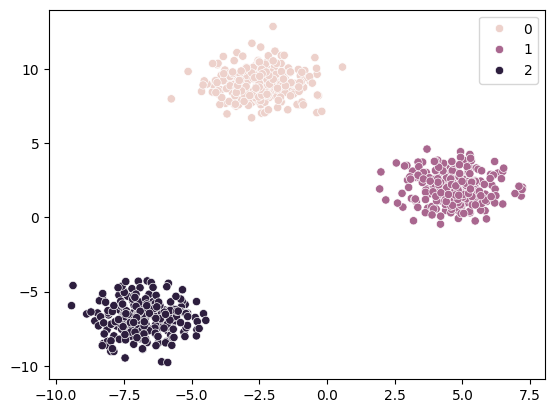

In [4]:
sns.scatterplot(x=dataset[0][:, 0], y=dataset[0][:, 1], hue=dataset[1], marker="o")

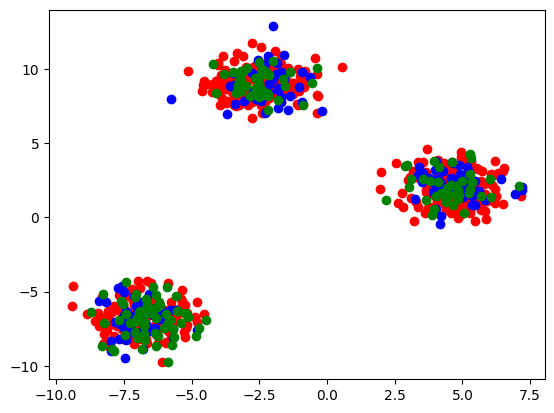

In [5]:
plt.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker="o", label="train")
plt.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker="o", label="cal")
plt.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker="o", label="test")

In [6]:
from conformal_region_designer.density_estimation import KDE
from conformal_region_designer.clustering import MeanShiftClustering
from conformal_region_designer.shapes.hyperrectangle import HyperRectangle

In [7]:
DELTA = 0.95

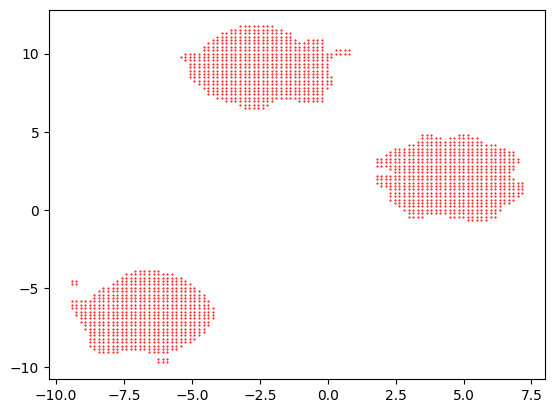

In [8]:
de = KDE()
de.fit(Z_train)
covered_range = de.generate_points(DELTA)
plt.scatter(covered_range[:, 0], covered_range[:, 1], s=1, marker=".", color="red")

In [9]:
covered_range.shape

(1838, 2)

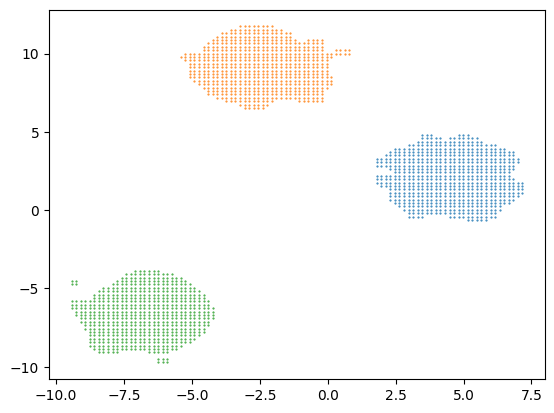

In [10]:
cluster = MeanShiftClustering()
cluster.fit(covered_range)
clustered_points = cluster.generate_clustered_points(covered_range)
for cluster in clustered_points:
    plt.scatter(cluster[:, 0], cluster[:, 1], s=1, marker=".")

In [12]:
shape_templates = [HyperRectangle() for cluster in clustered_points]

In [13]:
for i, shape_template in enumerate(shape_templates):
    shape_template.fit_shape(clustered_points[i])

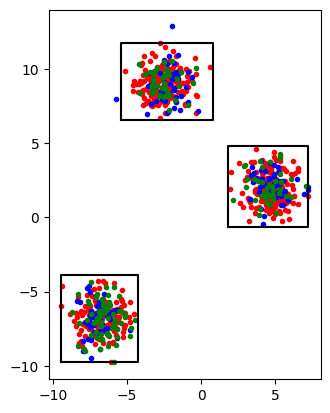

In [17]:
fig, ax = plt.subplots()
ax.scatter(Z_train[:, 0], Z_train[:, 1], color="red", marker=".", label="train")
ax.scatter(Z_cal[:, 0], Z_cal[:, 1], color="blue", marker=".", label="cal")
ax.scatter(Z_test[:, 0], Z_test[:, 1], color="green", marker=".", label="test")
ax.set_aspect("equal")
for shape_template in shape_templates:
    shape_template.plot(ax)

In [ ]:
for i, shape_template in enumerate(shape_templates):
    shape_template